# POWER BI DASHBOARD CAPSTONE PROJECT

## BUSINESS UNDERSTANDING


You are assigned a client by getINNOtized to design and deliver an end-to-end business  intelligence solution. Your client has collected transactional data for the year 2019 but hasn’t been able to  put it to good use. The client hopes you can analyze the data and put together a report  to help them find opportunities to drive more sales and work more efficiently. 

### Client's Questions: 

1. How much money did we make this year? 

2. Can we identify any seasonality in the  sales? 

3. What are our best and worst-selling products? 

4. How do sales compare to previous months or weeks? 

5. Which cities are our products delivered to most? 

6. How do product categories compare in revenue generated and quantities  ordered? 

7. You are required to show additional details from your findings in your data.

NB: Products with unit prices above $99.99 should be labelled high-level products  otherwise they should be basic level.

## DATA UNDERSTANDING

In [124]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import ScalarFormatter

In [2]:
# Load the 12 months of data 
jan = pd.read_csv('Sales_January_2019.csv') 
feb = pd.read_csv('Sales_February_2019.csv')
mar = pd.read_csv('Sales_March_2019.csv')
apr = pd.read_csv('Sales_April_2019.csv')
may = pd.read_csv('Sales_May_2019.csv')
jun = pd.read_csv('Sales_June_2019.csv')
jul = pd.read_csv('Sales_July_2019.csv')
aug = pd.read_csv('Sales_August_2019.csv')
sep = pd.read_csv('Sales_September_2019.csv')
octo = pd.read_csv('Sales_October_2019.csv')
nov = pd.read_csv('Sales_November_2019.csv')
dec = pd.read_csv('Sales_December_2019.csv')

months =[jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec]

#### Go through dataframes month by month


In [3]:
# Get info on all the datasets 
for month in months:
    month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12036 entries, 0 to 12035
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          12004 non-null  object
 1   Product           12004 non-null  object
 2   Quantity Ordered  12004 non-null  object
 3   Price Each        12004 non-null  object
 4   Order Date        12004 non-null  object
 5   Purchase Address  12004 non-null  object
dtypes: 

In [4]:
# check the first few rows for all the datasets
for month in months:
    print(month.head())

  Order ID                   Product Quantity Ordered Price Each  \
0   141234                    iPhone                1        700   
1   141235  Lightning Charging Cable                1      14.95   
2   141236          Wired Headphones                2      11.99   
3   141237          27in FHD Monitor                1     149.99   
4   141238          Wired Headphones                1      11.99   

       Order Date                       Purchase Address  
0  01/22/19 21:25        944 Walnut St, Boston, MA 02215  
1  01/28/19 14:15       185 Maple St, Portland, OR 97035  
2  01/17/19 13:33  538 Adams St, San Francisco, CA 94016  
3  01/05/19 20:33     738 10th St, Los Angeles, CA 90001  
4  01/25/19 11:59          387 10th St, Austin, TX 73301  
  Order ID                   Product Quantity Ordered Price Each  \
0   150502                    iPhone                1        700   
1   150503     AA Batteries (4-pack)                1       3.84   
2   150504    27in 4K Gaming Moni

In [5]:
# check the last few rows for all the datasets
for month in months:
    print(month.tail())

     Order ID                 Product Quantity Ordered Price Each  \
9718   150497            20in Monitor                1     109.99   
9719   150498        27in FHD Monitor                1     149.99   
9720   150499         ThinkPad Laptop                1     999.99   
9721   150500  AAA Batteries (4-pack)                2       2.99   
9722   150501            Google Phone                1        600   

          Order Date                     Purchase Address  
9718  01/26/19 19:09          95 8th St, Dallas, TX 75001  
9719  01/10/19 22:58  403 7th St, San Francisco, CA 94016  
9720  01/21/19 14:31      214 Main St, Portland, OR 97035  
9721  01/15/19 14:21    810 2nd St, Los Angeles, CA 90001  
9722  01/13/19 16:43       428 Cedar St, Boston, MA 02215  
      Order ID                   Product Quantity Ordered Price Each  \
12031   162004  Apple Airpods Headphones                1        150   
12032   162005    AAA Batteries (4-pack)                2       2.99   
12033   1

November and December seem to have the same entries and will need to be checked

In [6]:
# Confirm if November and December have the same entries
nov = nov.sort_values(by=['Order_ID'])
dec = dec.sort_values(by=['Order_ID'])

# Compare the DataFrames
are_equal = nov.equals(dec)

if are_equal:
    print("The datasets contain the same entries.")
else:
    print("The datasets do not contain the same entries.")


The datasets contain the same entries.


#### Early findings 
###### Calling the info method has revealed that:
1. The feature names are not identical in all the dataframes. 6 are identical and the other 6 are identical
2. The data types for the features are not the same for all the dataframes. 

###### Calling the head and tail methods have revealed that:
1. There were some entry mistakes 
2. The format of the date feature is different when comparing the first 6 months to the last 6 of the year
3. The month of November and December dataframes have the same entries 
4. The datasets are supposed to be from the year 2019 but have dates from other years

#### Next Steps
1. Drop the December dataset 
2. Merge dataframes to create 2 dataframes 
3. Change feature names to create identical ones in both dataframes 
4. Change the data types of all the features to the appropriate ones in both dataframes 
5. Use one datetime format for both dataframes 
6. Merge the dataframes to create one 
7. Change all the dates that are not in 2019 to their corresponding dates in 2019
8. Proceed with further analysis

## DATA PREPARATION

#### Creating 2 dataframes

In [7]:
# Create list of first 6 months
first_6 = months[:6]

# Create list of second 6 months excluding December
second_6 = months[6:11]


In [8]:
# Merge the dataframes 
df1 = pd.concat(first_6, ignore_index = True)
df2 = pd.concat(second_6, ignore_index = True)

##### Check to see if all the entries remained after merging

In [9]:
# Check merged datasets to confirm the number of entries 
a = len(jan)
b = len(feb)
c = len(mar)
d = len(apr)
e = len(may)
f = len(jun)

entries = [a, b, c, d, e, f]

total = 0
for length in entries:
    total += length
    
df1_length = len(df1)
print(f"Sum of entries of first 6 months is {total} while total entries in the merged dataset is {df1_length}")

Sum of entries of first 6 months is 85625 while total entries in the merged dataset is 85625


In [10]:
# Check merged datasets to confirm the number of entries 
g = len(jul)
h = len(aug)
i = len(sep)
j = len(octo)
k = len(nov)

entries = [g, h, i, j, k]

total = 0
for length in entries:
    total += length
    
df2_length = len(df2)
print(f"Sum of entries of first 6 months is {total} while total entries in the merged dataset is {df2_length}")

Sum of entries of first 6 months is 76108 while total entries in the merged dataset is 76108


#### Change feature names to create identical ones in both dataframes 

In [11]:
# Rename some columns in df1
df1.columns = df1.columns.str.replace('Price Each', 'Unit Price')
df1.columns = df1.columns.str.replace('Order Date', 'Date')

In [12]:
# Confirm the change 
df1.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Unit Price', 'Date',
       'Purchase Address'],
      dtype='object')

In [13]:
# Rename some columns in df2
df2.columns = df2.columns.str.replace('Price_Each', 'Unit Price')

df2.columns = df2.columns.str.replace('Order_Date', 'Date')

df2.columns = df2.columns.str.replace( 'Quantity_Ordered','Quantity Ordered')

df2.columns = df2.columns.str.replace('Purchase_Address', 'Purchase Address')

df2.columns = df2.columns.str.replace('Order_ID', 'Order ID')

In [14]:
# Confirm change
df2.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Unit Price',
       'Date', 'Purchase Address'],
      dtype='object')

In [15]:
to_drop = 'Unnamed: 0'
df2 = df2.drop(to_drop, axis=1)
df2.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Unit Price', 'Date',
       'Purchase Address'],
      dtype='object')

#### Change the data types of all the features to the appropriate ones in both dataframes

In [16]:
df1.dtypes 

Order ID            object
Product             object
Quantity Ordered    object
Unit Price          object
Date                object
Purchase Address    object
dtype: object

In [17]:
df2.dtypes

Order ID            float64
Product              object
Quantity Ordered    float64
Unit Price          float64
Date                 object
Purchase Address     object
dtype: object

##### Changes to be made 

##### df1
1. Check for duplicates and drop if any
2. Handle missing values
3. Convert 'Quantity Ordered' feature to integer 
4. Convert 'Unit Price' feature to float
5. Convert 'Date' feature to date time

##### df2
1. Check for duplicates and drop if any
2. Handle missing values
3. Convert 'Order ID  ' feature to object 
4. Convert 'Quantity Ordered' feature to integer
5. Convert 'Date' feature to date time

### df1

##### Check for duplicates

In [18]:
duplicates = df1.duplicated().sum()
duplicates

511

In [19]:
# Check percentage of duplicate values 
total_rows = df1.shape[0]
percentage = duplicates / total_rows * 100

if percentage < 2:
    print(f'Since the percentage is {percentage}, it is negligible compared to the total number of rows and so the duplicated entries can be dropped')
else:
    print(f'Since the percentage is {percentage} , it represents a substantial number and the entries will have to be put in proper format')

Since the percentage is 0.5967883211678832, it is negligible compared to the total number of rows and so the duplicated entries can be dropped


In [20]:
# Drop duplicates
df1 = df1.drop_duplicates()

##### Handling missing values

In [21]:
# Handle missing values
df1.isna().sum()

Order ID            1
Product             1
Quantity Ordered    1
Unit Price          1
Date                1
Purchase Address    1
dtype: int64

##### Convert 'Quantity Ordered' to Integer

In [22]:
# Find out unique entries 
df1['Quantity Ordered'].unique()

array(['1', '2', '3', '5', '4', nan, '7', 'Quantity Ordered', '6', '9'],
      dtype=object)

In [23]:
# Count the occurrences of 'Quantity Ordered' in the 'Quantity Ordered' column
count = (df1['Quantity Ordered'] == 'Quantity Ordered').sum()
count

1

In [24]:
# Replace 'Quantity Ordered' with nan in the 'Quantity Ordered' column
df1['Quantity Ordered'] = df1['Quantity Ordered'].replace('Quantity Ordered', np.nan)

In [25]:
# Check for the number of null values 
quantity_null = df1['Quantity Ordered'].isna().sum()
quantity_null

2

In [26]:
# Check percentage of null values 
total_rows = df1.shape[0]
percentage = quantity_null / total_rows * 100

if percentage < 2:
    print(f'Since the percentage is {percentage}, it is negligible compared to the total number of rows and so the null entries can be dropped')
else:
    print(f'Since the percentage is {percentage} , it represents a substantial number and the entries will have to be put in proper format')

Since the percentage is 0.002349789693822403, it is negligible compared to the total number of rows and so the null entries can be dropped


In [27]:
# Drop null entries 
df1 = df1.dropna(subset=['Quantity Ordered'])

In [28]:
# Convert to int
df1['Quantity Ordered'] = df1['Quantity Ordered'].astype(int)

In [29]:
# Confirm change
df1['Quantity Ordered'].dtype

dtype('int64')

##### Convert Unit Price to float

In [30]:
# Find out unique entries 
df1['Unit Price'].unique()

array(['700', '14.95', '11.99', '149.99', '2.99', '389.99', '11.95',
       '99.99', '150', '1700', '300', '400', '3.84', '600', '109.99',
       '379.99', '999.99', '600.0', '700.0', '150.0', '300.0', '1700.0'],
      dtype=object)

In [31]:
# Convert the 'Unit Price' feature to float
df1['Unit Price'] = df1['Unit Price'].astype(float)

In [32]:
# Confirm change
df1['Unit Price'].dtype

dtype('float64')

##### Convert 'Date' feature to date time



In [33]:
# Check for missing values 
df1['Date'].isna().sum()

0

In [34]:
# Convert the 'Date' to datetime data type
df1['Date'] = pd.to_datetime(df1['Date'])


<ipython-input-34-70124542402e>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Date'] = pd.to_datetime(df1['Date'])


In [35]:
 # Confirm change 
df1['Date'].dtype

dtype('<M8[ns]')

In [36]:
df1['Date'].head()

0   2019-01-22 21:25:00
1   2019-01-28 14:15:00
2   2019-01-17 13:33:00
3   2019-01-05 20:33:00
4   2019-01-25 11:59:00
Name: Date, dtype: datetime64[ns]

### df2 

##### Check for duplicates

In [37]:
duplicates = df2.duplicated().sum()
duplicates

481

In [38]:
# Check percentage of duplicate values 
total_rows = df2.shape[0]
percentage = duplicates / total_rows * 100

if percentage < 2:
    print(f'Since the percentage is {percentage}, it is negligible compared to the total number of rows and so the duplicated entries can be dropped')
else:
    print(f'Since the percentage is {percentage} , it represents a substantial number and the entries will have to be put in proper format')

Since the percentage is 0.6319966363588584, it is negligible compared to the total number of rows and so the duplicated entries can be dropped


In [39]:
# Drop duplicates 
df2 = df2.drop_duplicates()

##### Handle missing values 

In [40]:
# Check for number of missing values 
df2.isna().sum()

Order ID            2
Product             1
Quantity Ordered    2
Unit Price          2
Date                2
Purchase Address    1
dtype: int64

In [41]:
# Check percentage of missing values to total number of rows 
max_null = 2
total_rows = df2.shape[0]
percentage = max_null / total_rows * 100

if percentage < 2:
    print(f'Since {percentage} is negligible, null values can be dropped')
else:
    print(f'Since {percentage} is substantial, the entries will have to be put into another format')

Since 0.0026445581604453436 is negligible, null values can be dropped


In [42]:
# Drop all null values 
df2 = df2.dropna()

In [43]:
# Confirm 
df2.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Unit Price          0
Date                0
Purchase Address    0
dtype: int64

##### Convert Order ID column into object data type

In [44]:
# Change to object data type
df2['Order ID'] = df2['Order ID'].astype('object')

In [45]:
# Confirm change
df2['Order ID'].dtype

dtype('O')

##### Convert Quantity Ordered into integer data type

In [46]:
# Change to integer data type
df2['Quantity Ordered'] = df2['Quantity Ordered'].astype(int)

In [47]:
# Confirm change
df2['Quantity Ordered'].dtype

dtype('int64')

##### Convert Date column to date time format

In [48]:
# change to date time 
df2['Date'] = pd.to_datetime(df2['Date'])

In [49]:
# Confirm change 
df2['Date'].dtype

dtype('<M8[ns]')

In [50]:
df2['Date'].info()

<class 'pandas.core.series.Series'>
Index: 75625 entries, 0 to 76107
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
75625 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.2 MB


In [51]:
df2['Date'].head()

0   2026-07-19 16:51:00
1   2005-07-19 08:55:00
2   2029-07-19 12:41:00
3   2028-07-19 10:15:00
4   2031-07-19 02:13:00
Name: Date, dtype: datetime64[ns]

###### Some dates in df2 have their years recorded as years that are out of range. The assumption made is that there were
###### mistakes in the data collection process. The years will have to be corrected. The correction will be made after 
###### both dataframes are merged to ensure that any mistakes in df1 are corrected as well 

### Concatenate df1 and df2

In [52]:
df = pd.concat([df1,df2])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160737 entries, 0 to 76107
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          160737 non-null  object        
 1   Product           160737 non-null  object        
 2   Quantity Ordered  160737 non-null  int64         
 3   Unit Price        160737 non-null  float64       
 4   Date              160737 non-null  datetime64[ns]
 5   Purchase Address  160737 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [54]:
# Check for missing values
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Unit Price          0
Date                0
Purchase Address    0
dtype: int64

##### Change all date years to 2019 

In [55]:
# Set the year to 2019
df['Date'] = df['Date'].apply(lambda x: x.replace(year=2019))

In [56]:
# Check if any date has a year other than 2019
not_2019 = (df['Date'].dt.year != 2019).any()
not_2019

False

##### Create a month column 

In [57]:
# Create a new 'Month' column with numeric month values
df['Month'] = df['Date'].dt.month

In [58]:
# Define a mapping of numeric months to their corresponding month names
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

In [59]:
# Use the map function to apply the mapping
df['Month'] = df['Month'].map(month_mapping)

In [60]:
df['Month']

0         January
1         January
2         January
3         January
4         January
           ...   
76103    November
76104    November
76105    November
76106    November
76107    November
Name: Month, Length: 160737, dtype: object

##### Create a week column 

In [61]:
df['Week'] = df['Date'].dt.isocalendar().week

In [62]:
df['Week']

0         4
1         5
2         3
3         1
4         4
         ..
76103    47
76104    47
76105    47
76106    47
76107    47
Name: Week, Length: 160737, dtype: UInt32

##### Create 'Product Class' column showing high-level and basic level products


In [63]:
df['Product Class'] = np.where(df['Unit Price'] > 99.99, 'high-level', 'basic level')


In [64]:
# Check new column
df['Product Class']

0         high-level
1        basic level
2        basic level
3         high-level
4        basic level
            ...     
76103    basic level
76104    basic level
76105    basic level
76106    basic level
76107     high-level
Name: Product Class, Length: 160737, dtype: object

In [65]:
df['Product Class'].unique()

array(['high-level', 'basic level'], dtype=object)

In [66]:
df.head()

,Order ID,Product,Quantity Ordered,Unit Price,Date,Purchase Address,Month,Week,Product Class
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",January,4,high-level
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",January,5,basic level
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",January,3,basic level
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",January,1,high-level
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",January,4,basic level


##### Create City column

In [67]:
# Extract the city name from between the first and second commas of Purchase Address
df['City'] = df['Purchase Address'].str.split(',').str[1]

In [68]:
# Check cities
df['City']

0                Boston
1              Portland
2         San Francisco
3           Los Angeles
4                Austin
              ...      
76103       Los Angeles
76104            Austin
76105            Boston
76106            Boston
76107            Boston
Name: City, Length: 160737, dtype: object

In [69]:
# Check unique cities
df['City'].unique()

array([' Boston', ' Portland', ' San Francisco', ' Los Angeles',
       ' Austin', ' Atlanta', ' Seattle', ' New York City', ' Dallas'],
      dtype=object)

##### Create Revenue column 

In [70]:
# Create new column 
df['Revenue'] = df['Unit Price'] * df['Quantity Ordered']

In [71]:
df.head()

,Order ID,Product,Quantity Ordered,Unit Price,Date,Purchase Address,Month,Week,Product Class,City,Revenue
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",January,4,high-level,Boston,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",January,5,basic level,Portland,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",January,3,basic level,San Francisco,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",January,1,high-level,Los Angeles,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",January,4,basic level,Austin,11.99


##### Sort Date column as the index 


In [72]:
df = df.set_index('Date')

In [73]:
df

,Order ID,Product,Quantity Ordered,Unit Price,Purchase Address,Month,Week,Product Class,City,Revenue
Date,,,,,,,,,,
2019-01-22 21:25:00,141234,iPhone,1,700.00,"944 Walnut St, Boston, MA 02215",January,4,high-level,Boston,700.00
2019-01-28 14:15:00,141235,Lightning Charging Cable,1,14.95,"185 Maple St, Portland, OR 97035",January,5,basic level,Portland,14.95
2019-01-17 13:33:00,141236,Wired Headphones,2,11.99,"538 Adams St, San Francisco, CA 94016",January,3,basic level,San Francisco,23.98
2019-01-05 20:33:00,141237,27in FHD Monitor,1,149.99,"738 10th St, Los Angeles, CA 90001",January,1,high-level,Los Angeles,149.99
2019-01-25 11:59:00,141238,Wired Headphones,1,11.99,"387 10th St, Austin, TX 73301",January,4,basic level,Austin,11.99
...,...,...,...,...,...,...,...,...,...,...
2019-11-19 14:17:00,295660.0,AAA Batteries (4-pack),2,2.99,"574 4th St, Los Angeles, CA 90001",November,47,basic level,Los Angeles,5.98
2019-11-19 07:22:00,295661.0,USB-C Charging Cable,1,11.95,"359 1st St, Austin, TX 73301",November,47,basic level,Austin,11.95
2019-11-19 16:12:00,295662.0,Lightning Charging Cable,1,14.95,"900 10th St, Boston, MA 02215",November,47,basic level,Boston,14.95


In [74]:
# Format the Unit Price and Revenue columns to have 2 decimal places 
df['Unit Price'] = df['Unit Price'].round(2)
df['Revenue'] = df['Revenue'].round(2)

In [75]:
df

,Order ID,Product,Quantity Ordered,Unit Price,Purchase Address,Month,Week,Product Class,City,Revenue
Date,,,,,,,,,,
2019-01-22 21:25:00,141234,iPhone,1,700.00,"944 Walnut St, Boston, MA 02215",January,4,high-level,Boston,700.00
2019-01-28 14:15:00,141235,Lightning Charging Cable,1,14.95,"185 Maple St, Portland, OR 97035",January,5,basic level,Portland,14.95
2019-01-17 13:33:00,141236,Wired Headphones,2,11.99,"538 Adams St, San Francisco, CA 94016",January,3,basic level,San Francisco,23.98
2019-01-05 20:33:00,141237,27in FHD Monitor,1,149.99,"738 10th St, Los Angeles, CA 90001",January,1,high-level,Los Angeles,149.99
2019-01-25 11:59:00,141238,Wired Headphones,1,11.99,"387 10th St, Austin, TX 73301",January,4,basic level,Austin,11.99
...,...,...,...,...,...,...,...,...,...,...
2019-11-19 14:17:00,295660.0,AAA Batteries (4-pack),2,2.99,"574 4th St, Los Angeles, CA 90001",November,47,basic level,Los Angeles,5.98
2019-11-19 07:22:00,295661.0,USB-C Charging Cable,1,11.95,"359 1st St, Austin, TX 73301",November,47,basic level,Austin,11.95
2019-11-19 16:12:00,295662.0,Lightning Charging Cable,1,14.95,"900 10th St, Boston, MA 02215",November,47,basic level,Boston,14.95


##### Create Seasons for the Data. In this case Quarters


In [76]:
# Define a custom function to map months to quarters
def map_month_to_quarter(month):
    if month in ['January', 'February', 'March']:
        return 'Q1'
    elif month in ['April', 'May', 'June']:
        return 'Q2'
    elif month in ['July', 'August', 'September']:
        return 'Q3'
    elif month in ['October', 'November', 'December']:
        return 'Q4'
    else:
        return None

In [77]:
# Create the 'Quarter' column using the custom function
df['Quarter'] = df['Month'].apply(map_month_to_quarter)

In [78]:
df['Quarter'].unique()

array(['Q1', 'Q2', 'Q3', 'Q4'], dtype=object)

### Save the dataframe

In [79]:
df.to_csv('Cleaned Data.csv')

### EXPLORATORY DATA ANALYSIS
#### Client's Questions & Answers

##### 1. How much money did we make this year? 

In [80]:
# Find the sum of the 'Revenue' column 
revenue_sum = df['Revenue'].sum()

# Round revenue_sum to 2 decimal places
rounded_revenue = round(revenue_sum, 2)

print(f'We made ${rounded_revenue} in the year 2019')

We made $29851388.46 in the year 2019


##### 2. Can we identify any seasonality in the  sales?

In [81]:
# Group the DataFrame by the 'Quarter' column and calculate the sum of 'Quantity Ordered' for each group
quarterly_sales = df.groupby('Quarter')['Quantity Ordered'].sum()

In [82]:
# Print the sum of quantities sold for each quarter
print("Sum of Sales for Each Quarter:")
print(quarterly_sales)

Sum of Sales for Each Quarter:
Quarter
Q1    41262
Q2    54423
Q3    42574
Q4    42472
Name: Quantity Ordered, dtype: int64


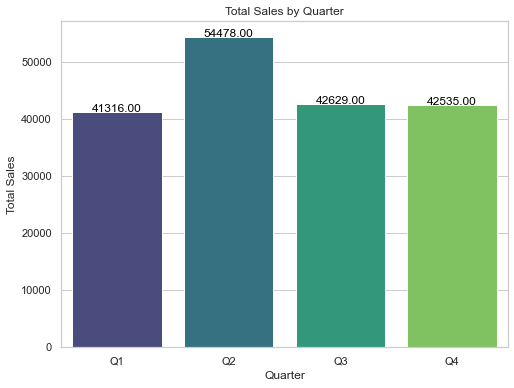

In [83]:
# Visualize the data
quarterly_sales = {
    'Q1': 41316,
    'Q2': 54478,
    'Q3': 42629,
    'Q4': 42535,
}
# Create a DataFrame from the quarterly_sales dictionary
data = {'Quarter': list(quarterly_sales.keys()), 'Quantity Ordered': list(quarterly_sales.values())}
dfq = pd.DataFrame(data)

# Create a bar plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plot = sns.barplot(x='Quarter', y='Quantity Ordered', data=dfq, palette="viridis")
plt.title("Total Sales by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")

# Annotate the bars with their values
for index, row in dfq.iterrows():
    plot.text(index, row['Quantity Ordered'], f"{row['Quantity Ordered']:.2f}", color='black', ha="center")

plt.show()

##### 3. What are our best and worst-selling products? 

In [84]:
# Group the 'Products' by the sum of the 'Quantities Ordered'
product_sales = df.groupby('Product')['Quantity Ordered'].sum()

In [85]:
# Print the sales of each product 
print("Sum of Sales for Each Quarter:")
print(product_sales)

Sum of Sales for Each Quarter:
Product
20in Monitor                   3555
27in 4K Gaming Monitor         5380
27in FHD Monitor               6576
34in Ultrawide Monitor         5344
AA Batteries (4-pack)         23902
AAA Batteries (4-pack)        26749
Apple Airpods Headphones      13563
Bose SoundSport Headphones    11609
Flatscreen TV                  4150
Google Phone                   4813
LG Dryer                        560
LG Washing Machine              586
Lightning Charging Cable      20086
Macbook Pro Laptop             4081
ThinkPad Laptop                3589
USB-C Charging Cable          20681
Vareebadd Phone                1783
Wired Headphones              17785
iPhone                         5939
Name: Quantity Ordered, dtype: int64


In [86]:
# Convert the Series to a dictionary
product_sales_dict = product_sales.to_dict()


In [87]:
# Create a DataFrame from the product_sales dictionary
data = {'Product': list(product_sales_dict.keys()), 'Quantity Ordered': list(product_sales_dict.values())}
dfp = pd.DataFrame(data)

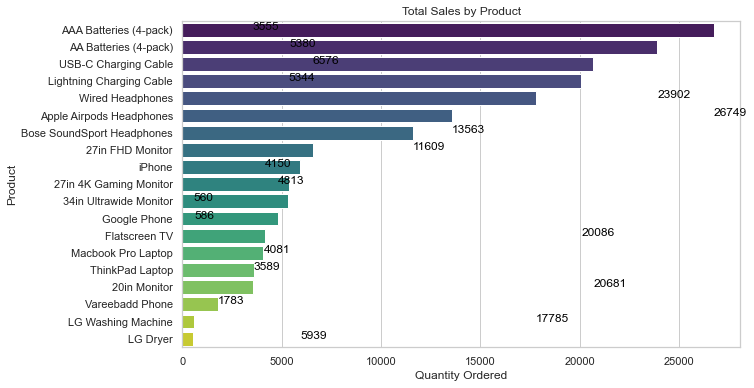

In [88]:
# Sort the DataFrame by 'Quantity Ordered' in descending order for a better plot
dfp = dfp.sort_values(by='Quantity Ordered', ascending=False)

# Create a bar plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='Quantity Ordered', y='Product', data=dfp, palette="viridis")
plt.title("Total Sales by Product")
plt.xlabel("Quantity Ordered")
plt.ylabel("Product")

# Annotate the bars with their values
for index, row in dfp.iterrows():
    plot.text(row['Quantity Ordered'], index, f"{row['Quantity Ordered']}", color='black', ha="left")

plt.show()

##### From the above graph we can see that the best selling product is AAA Batteries(4-pack) and the worst selling product is LG Dryer

##### 4. How do sales compare to previous months or weeks? 

In [89]:
# Define the custom order for months
custom_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

In [90]:
# Convert the 'Month' column to a Categorical data type with the custom order
df['Month'] = pd.Categorical(df['Month'], categories=custom_order, ordered=True)


In [91]:
# Group the 'Month' by the sum of the 'Quantities Ordered'
month_sales = df.groupby('Month')['Revenue'].sum()
month_sales

Month
January      1812742.87
February     2200078.08
March        2804973.35
April        3389217.98
May          3150616.23
June         2576280.15
July         2646461.32
August       2241083.37
September    2094465.69
October      3734777.86
November     3197875.05
December        2816.51
Name: Revenue, dtype: float64

In [92]:
# Turn the month_sales dataframe into a dictionary
month_sales = {
    'January': 10852,
    'February': 13431,
    'March': 16979,
    'April': 20536,
    'May': 18653,
    'June': 15234,
    'July': 16054,
    'August': 13429,
    'September': 13091,
    'October': 22669,
    'November': 19769,
    'December': 34,
}

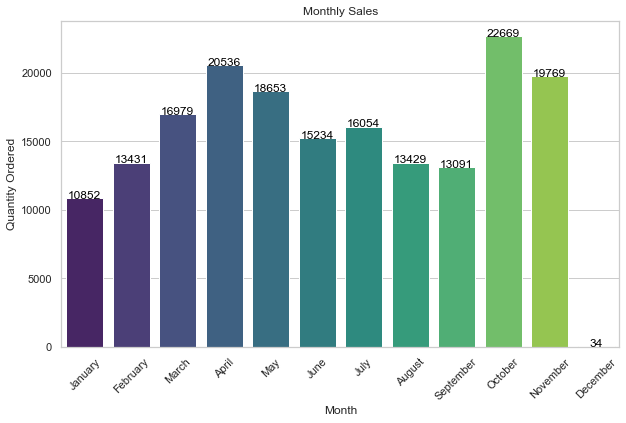

In [93]:
# Create a DataFrame from the month_sales dictionary
data = {'Month': list(month_sales.keys()), 'Quantity Ordered': list(month_sales.values())}
dfm = pd.DataFrame(data)

# Set the 'Month' column as categorical with the custom order
df['Month'] = pd.Categorical(df['Month'], categories=custom_order, ordered=True)

# Sort the DataFrame by the custom order
df = df.sort_values('Month')

# Create a bar plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='Month', y='Quantity Ordered', data=dfm, palette="viridis")
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Quantity Ordered")

# Annotate the bars with their values
for index, row in dfm.iterrows():
    plot.text(index, row['Quantity Ordered'], f"{row['Quantity Ordered']}", color='black', ha="center")

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

In [94]:
# Group the 'Week' by the sum of the 'Revenue'
week_sales = df.groupby('Week')['Revenue'].sum()
week_sales

Week
1      344678.73
2      409389.43
3      394921.11
4      426020.17
5      459570.62
6      565300.05
7      568199.28
8      535207.51
9      578306.44
10     640496.38
11     595771.07
12     629060.55
13     670872.96
14     774492.97
15     761454.22
16     805297.45
17     808694.68
18     764462.62
19     729309.99
20     695631.88
21     709784.55
22     668240.16
23     616368.48
24     594043.83
25     611609.50
26     576724.03
27       3028.38
29    2643432.94
34    2241083.37
38    2094465.69
42    3734777.86
47    3197875.05
51       2816.51
Name: Revenue, dtype: float64

In [95]:
# Sample data (replace with your weekly sales data)
week_sales = {
    1: 344678.73,
    2: 409389.43,
    3: 394921.11,
    4: 426020.17,
    5: 459570.62,
    6: 565300.05,
    7: 568199.28,
    8: 535207.51,
    9: 578306.44,
    10: 640496.38,
    11: 595771.07,
    12: 629060.55,
    13: 670872.96,
    14: 774492.97,
    15: 761454.22,
    16: 805297.45,
    17: 808694.68,
    18: 764462.62,
    19: 729309.99,
    20: 695631.88,
    21: 709784.55,
    22: 668240.16,
    23: 616368.48,
    24: 594043.83,
    25: 611609.50,
    26: 576724.03,
    27: 3028.38,
    29: 2643432.94,
    34: 2241083.37,
    38: 2094465.69,
    42: 3734777.86,
    47: 3197875.05,
    51: 2816.51,
}

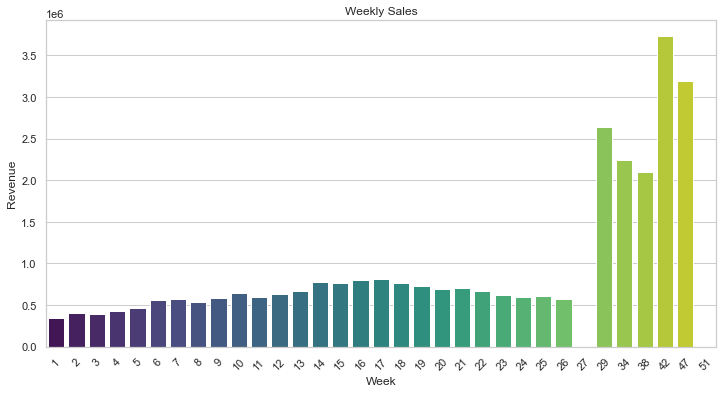

In [96]:
# Create a DataFrame from the week_sales dictionary
data = {'Week': list(week_sales.keys()), 'Revenue': list(week_sales.values())}
dfw = pd.DataFrame(data)

# Create a bar plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plot = sns.barplot(x='Week', y='Revenue', data=dfw, palette="viridis")
plt.title("Weekly Sales")
plt.xlabel("Week")
plt.ylabel("Revenue")

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

##### 5. Which cities are our products delivered to most?

In [102]:
# Find the value counts of the City column 
city_counts = df['City'].value_counts()
city_counts

City
 San Francisco    38656
 Los Angeles      25677
 New York City    21442
 Boston           17206
 Atlanta          12877
 Dallas           12793
 Seattle          12739
 Portland         10804
 Austin            8543
Name: count, dtype: int64

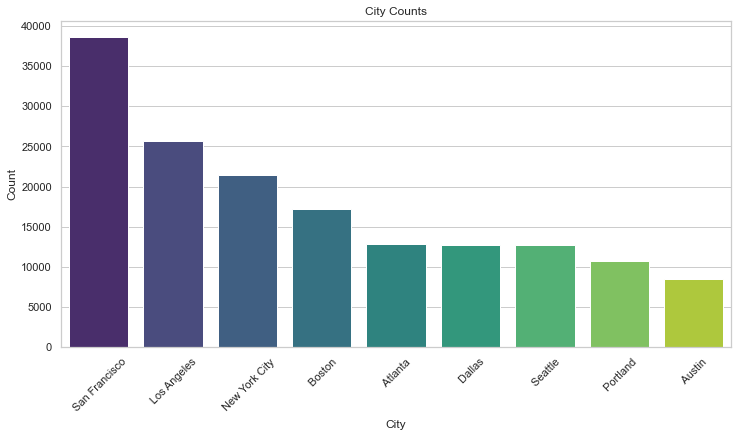

In [104]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")
plt.title("City Counts")
plt.xlabel("City")
plt.ylabel("Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

##### 6. How do product categories compare in revenue generated and quantities ordered

In [109]:
# Find the revenue by product 
product_category_sum = df.groupby('Product')['Revenue'].sum()
product_category_sum

Product
20in Monitor                   391014.45
27in 4K Gaming Monitor        2098146.20
27in FHD Monitor               986334.24
34in Ultrawide Monitor        2030666.56
AA Batteries (4-pack)           91783.68
AAA Batteries (4-pack)          79979.51
Apple Airpods Headphones      2034450.00
Bose SoundSport Headphones    1160783.91
Flatscreen TV                 1245000.00
Google Phone                  2887800.00
LG Dryer                       336000.00
LG Washing Machine             351600.00
Lightning Charging Cable       300285.70
Macbook Pro Laptop            6937700.00
ThinkPad Laptop               3588964.11
USB-C Charging Cable           247137.95
Vareebadd Phone                713200.00
Wired Headphones               213242.15
iPhone                        4157300.00
Name: Revenue, dtype: float64

In [110]:
# Find the Quantities sold per product 
product_category_orders = df.groupby('Product')['Quantity Ordered'].sum()
product_category_orders

Product
20in Monitor                   3555
27in 4K Gaming Monitor         5380
27in FHD Monitor               6576
34in Ultrawide Monitor         5344
AA Batteries (4-pack)         23902
AAA Batteries (4-pack)        26749
Apple Airpods Headphones      13563
Bose SoundSport Headphones    11609
Flatscreen TV                  4150
Google Phone                   4813
LG Dryer                        560
LG Washing Machine              586
Lightning Charging Cable      20086
Macbook Pro Laptop             4081
ThinkPad Laptop                3589
USB-C Charging Cable          20681
Vareebadd Phone                1783
Wired Headphones              17785
iPhone                         5939
Name: Quantity Ordered, dtype: int64

In [128]:
# Visualize 
product_data = pd.DataFrame({'Revenue': product_category_sum, 'Quantity Ordered': product_category_orders})

# Create an interactive scatter plot with Plotly
fig = px.scatter(product_data, x='Revenue', y='Quantity Ordered', text=product_data.index, 
                 title="How Product Categories compare in Revenue & Quantity Ordered by Product",
                 labels={'Revenue': 'Revenue (in millions)', 'Quantity Ordered': 'Quantity Ordered(k=1000)'},
                 template="plotly_dark")

# Show the plot with product names displayed on hover
fig.update_traces(textposition='top center')
fig.update_xaxes(tickformat=".2f")

fig.show()

##### 7. How many products were sold in the year?


In [130]:
# Find the sum of Quantities ordered
quantities_sum = df['Quantity Ordered'].sum()

print(f'The number of products sold by the company in the year 2019 is {quantities_sum}')

The number of products sold by the company in the year 2019 is 180731


##### 8. How many orders were made in the whole year?

In [132]:
# Find the sum of rows or entries
entries_sum = df.shape[0]

print(f'The total number of orders made in the year 2019 is {entries_sum}')

The total number of orders made in the year 2019 is 160737


##### 9. How did high-level products do against basic level products?

In [137]:
# Find the quantities of high-level and basic level products sold
prod_class = df.groupby('Product Class')['Quantity Ordered'].sum().reset_index()
prod_class

,Product Class,Quantity Ordered
0,basic level,120812
1,high-level,59919


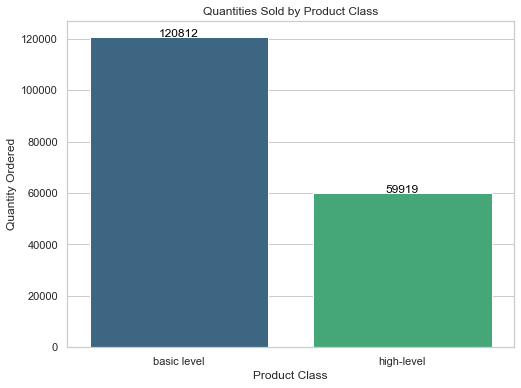

In [138]:
# Create a bar plot to show the quantities sold for each product class
plt.figure(figsize=(8, 6))
sns.barplot(x='Product Class', y='Quantity Ordered', data=prod_class, palette="viridis")
plt.title("Quantities Sold by Product Class")
plt.xlabel("Product Class")
plt.ylabel("Quantity Ordered")

# Annotate the bars with their values
for index, row in prod_class.iterrows():
    plt.text(index, row['Quantity Ordered'], f"{row['Quantity Ordered']}", color='black', ha="center")

plt.show()

From the plot above, it is clear that basic level products sold more in terms of quantities than high-level products